# Series temporales

Para el trabajo con series temporales se recomienda el uso de la biblioteca [darts](https://unit8co.github.io/darts/).

In [1]:
import pandas as pd
from darts.datasets import AirPassengersDataset

dataset = AirPassengersDataset()

<Axes: xlabel='Month'>

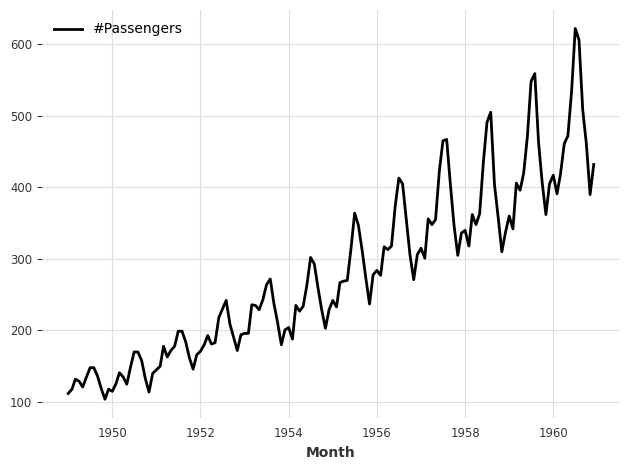

In [2]:
series = dataset.load()
series.plot()

<Axes: xlabel='Month'>

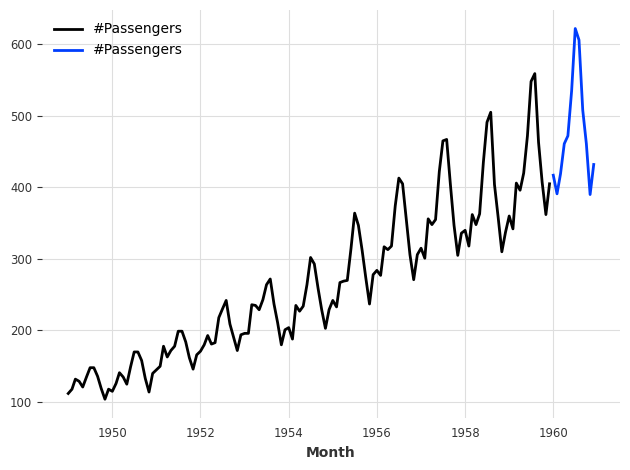

In [4]:
series_train, series_test = series.split_before(pd.Timestamp('1960'))

series_train.plot()
series_test.plot()

In [59]:
from darts.metrics import mae, rmse, mse, mape

def generate_metrics(series_test, series_pred):
    print(f"MAE  = {mae(series_test, series_pred):.2f}")
    print(f"MSE = {mse(series_test, series_pred):.2f}")
    print(f"RMSE = {rmse(series_test, series_pred):.2f}")
    print(f"MAPE = {mape(series_test, series_pred):.2f}")

MAE  = 213.67
MSE = 51196.15
RMSE = 226.27


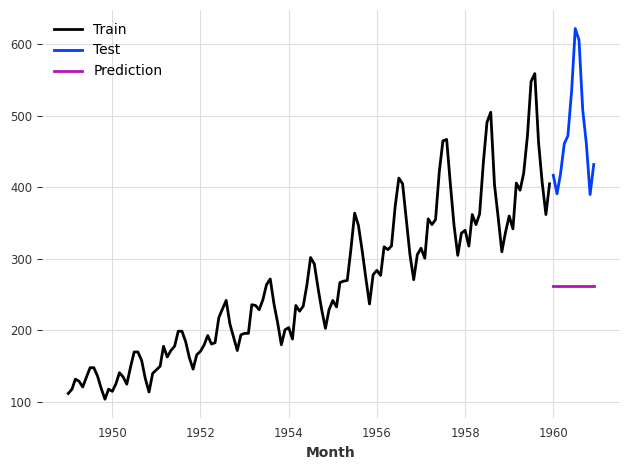

In [46]:
from darts.models import NaiveMean

model = NaiveMean()

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

MAE  = 66.31
MSE = 8587.05
RMSE = 92.67


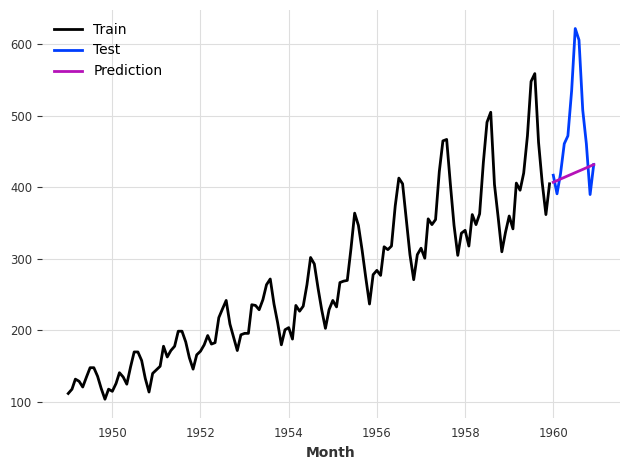

In [47]:
from darts.models import NaiveDrift

model = NaiveDrift()

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

MAE  = 57.64
MSE = 6323.79
RMSE = 79.52


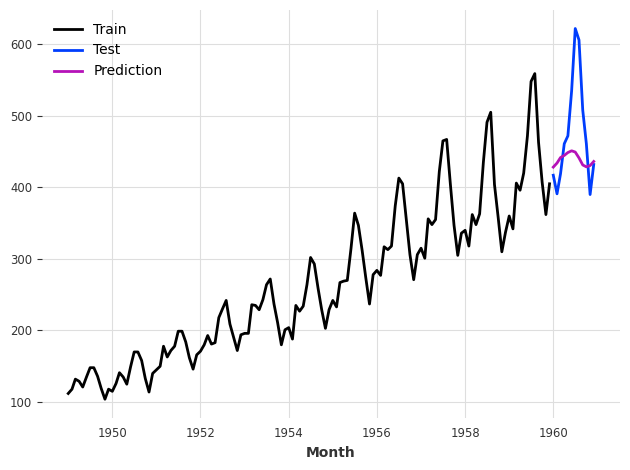

In [48]:
from darts.models import NaiveMovingAverage

model = NaiveMovingAverage(input_chunk_length=12)

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

MAE  = 57.64
MSE = 6323.79
RMSE = 79.52


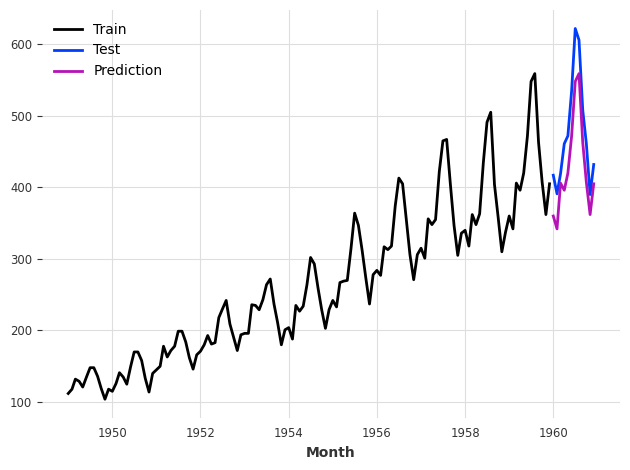

In [49]:
from darts.models import NaiveSeasonal

model = NaiveSeasonal(K=12)

model.fit(series_train)

series_train.plot(label='Train')
series_test.plot(label='Test')
model.predict(12).plot(label='Prediction')

generate_metrics(series_test, series_pred)

MAE  = 14.72
MSE = 305.81
RMSE = 17.49


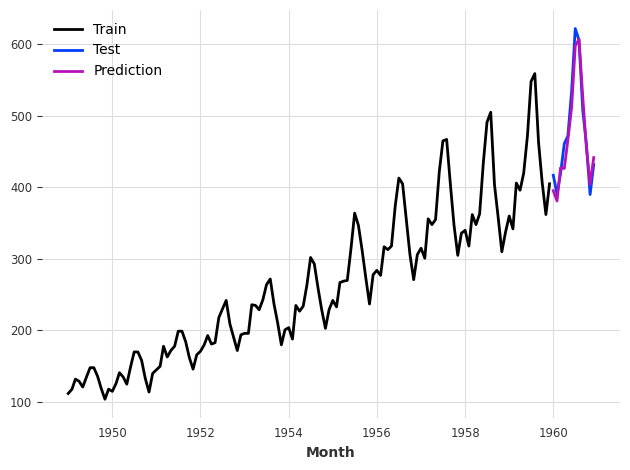

In [50]:
from darts.models import LinearRegressionModel

model = LinearRegressionModel(lags=12)

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

<Axes: xlabel='Month'>

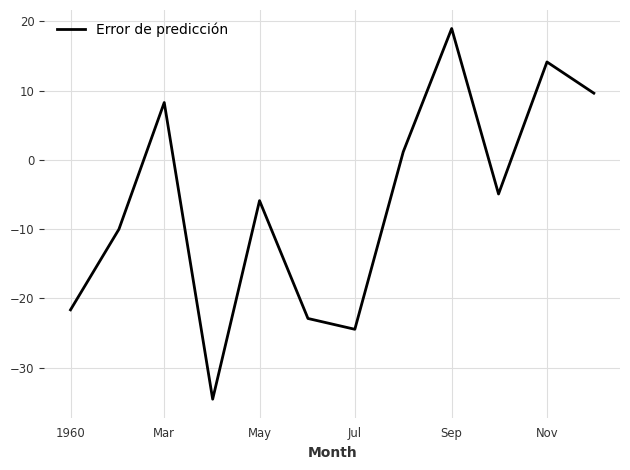

In [36]:
err = series_pred - series_test

err.plot(label='Error de predicción')

MAE  = 10.30
MSE = 249.97
RMSE = 15.81
MAPE = 2.21


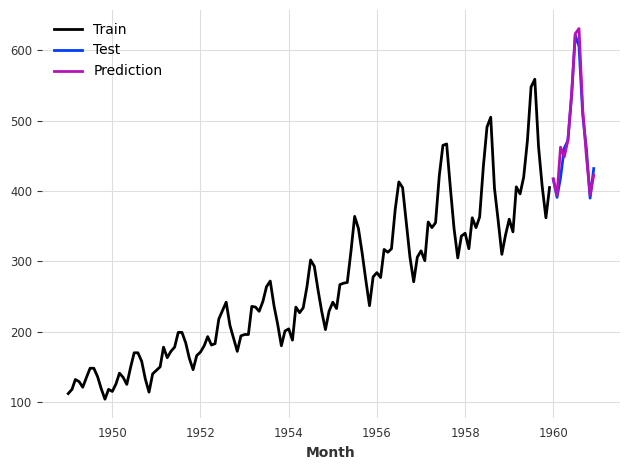

In [65]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import ModelMode, SeasonalityMode

model = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal_periods=12, seasonal=SeasonalityMode.MULTIPLICATIVE)

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

/Users/miguel/workspace/ufm-python-for-finance/.venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/miguel/workspace/ufm-python-for-finance/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE  = 13.77
MSE = 305.97
RMSE = 17.49
MAPE = 2.94


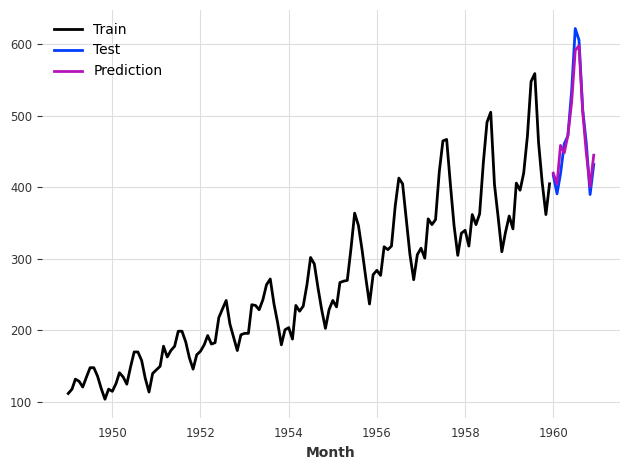

In [68]:
from darts.models import ARIMA

model = ARIMA()

model.fit(series_train)
series_pred = model.predict(12)

series_train.plot(label='Train')
series_test.plot(label='Test')
series_pred.plot(label='Prediction')

generate_metrics(series_test, series_pred)

## Extracción de estacionalidad y tendencia

<Axes: xlabel='Month'>

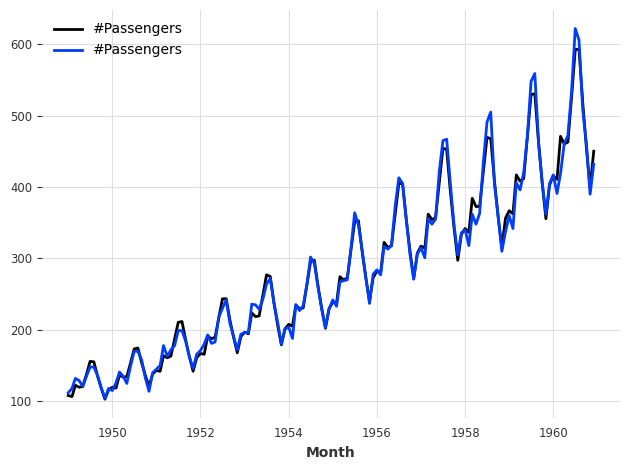

In [80]:
from darts.utils.statistics import extract_trend_and_seasonality

trend, seasonality = extract_trend_and_seasonality(series)
(trend * seasonality).plot()
series.plot()